# Projet Vision par Ordinateur

In [5]:

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns


## 1. Chargement du dataset CIFAR-10 et préparation

In [6]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Shape X_train:", x_train.shape)
print("Shape y_train:", y_train.shape)


Shape X_train: (50000, 32, 32, 3)
Shape y_train: (50000, 1)


## 2. Répartition des classes

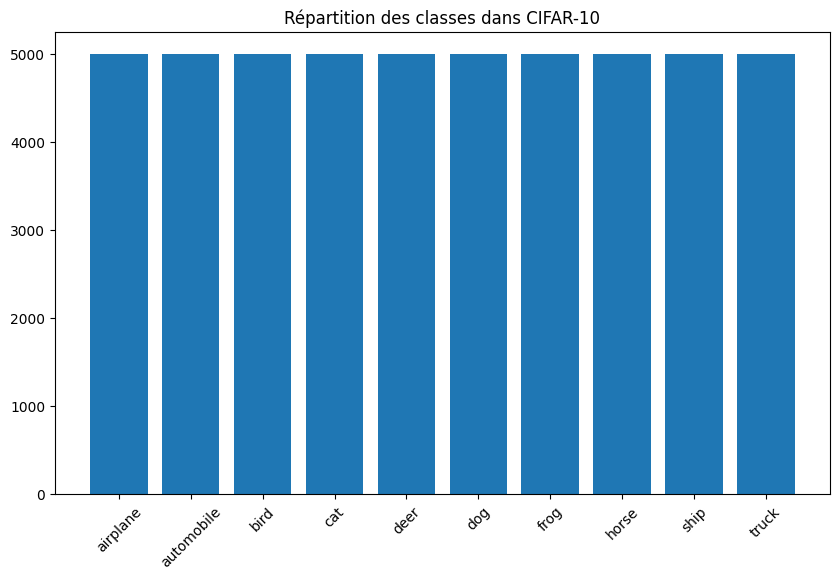

In [7]:

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
counts = np.bincount(y_train.flatten())

plt.figure(figsize=(10,6))
plt.bar(classes, counts)
plt.title("Répartition des classes dans CIFAR-10")
plt.xticks(rotation=45)
plt.show()


## 3. Vérification des images et labels

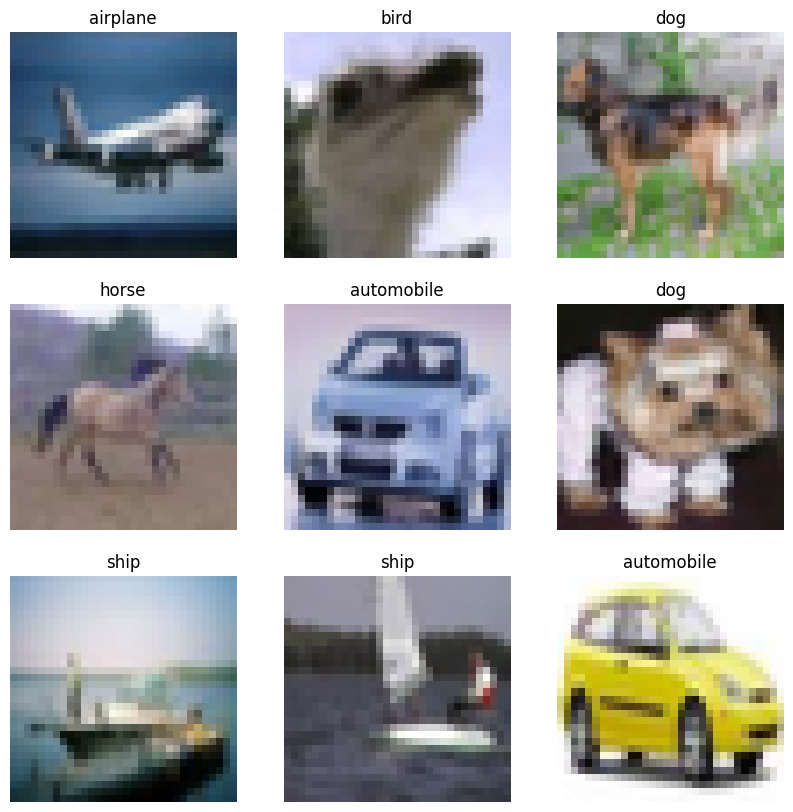

In [8]:

idx = np.random.choice(len(x_train), 9, replace=False)
plt.figure(figsize=(10,10))
for i, index in enumerate(idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[index])
    plt.title(classes[y_train[index][0]])
    plt.axis('off')
plt.show()


## 4. Construction et entraînement du modèle CNN

In [9]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64,
                    validation_split=0.2, callbacks=[early_stop])


g:\Git\tpvpocifar\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.2984 - loss: 1.8967 - val_accuracy: 0.5131 - val_loss: 1.3926
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.4825 - loss: 1.4367 - val_accuracy: 0.5736 - val_loss: 1.2158
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5459 - loss: 1.2733 - val_accuracy: 0.6104 - val_loss: 1.1084
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5841 - loss: 1.1675 - val_accuracy: 0.6321 - val_loss: 1.0565
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6090 - loss: 1.1208 - val_accuracy: 0.6439 - val_loss: 1.0145
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6293 - loss: 1.0591 - val_accuracy: 0.6614 - val_loss: 0.9738
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6476 - loss: 1.0039 - val_accuracy: 0.6615 - val_loss: 0.9642
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6617 - loss: 0.9641 - 

## 5. Analyse des performances - courbes

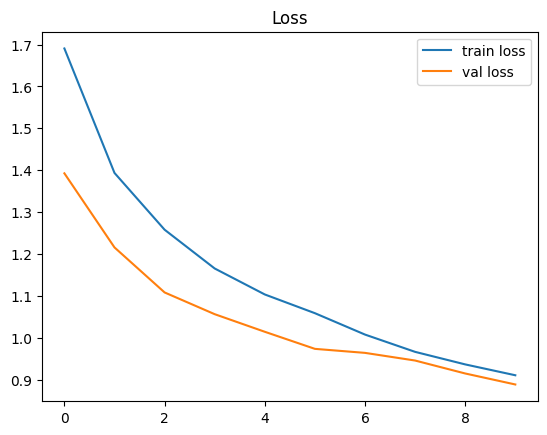

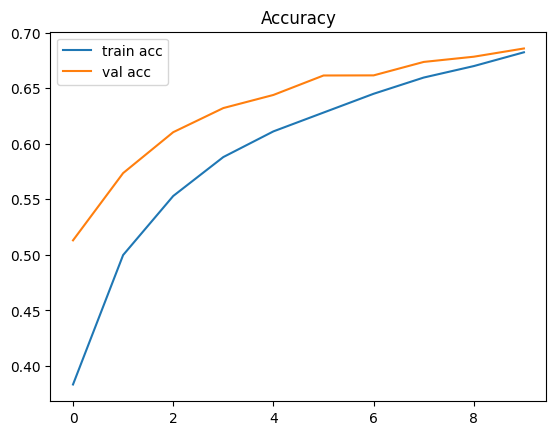

In [10]:

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")
plt.show()


## 6. Prédiction, accuracy et matrice de confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6948 - loss: 0.8819
Test accuracy: 0.6905999779701233
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


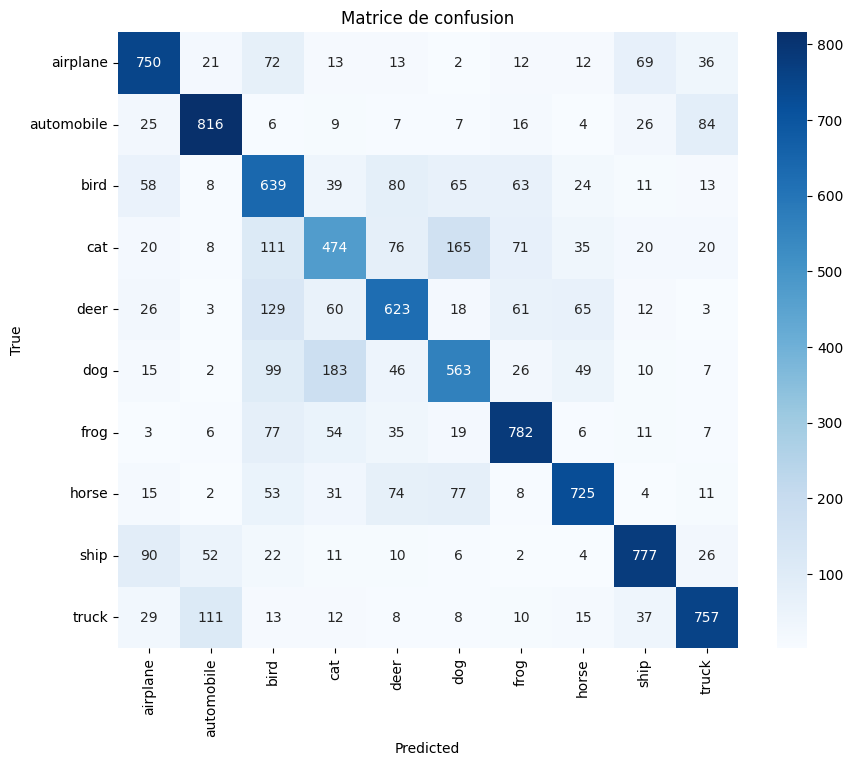

In [11]:

loss, acc = model.evaluate(x_test, y_test_cat)
print("Test accuracy:", acc)

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matrice de confusion")
plt.show()


## 7. Sauvegarde du modèle

In [12]:

model.save("cifar10_model.h5")
